<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2002%20-%20Higher%20Order%20Methods/2_Problem%20Sheet/02_PS%20Question%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Sheet 2 Question 6 - 2nd Order Taylor Solution

The general form of the population growth differential equation
\begin{equation}  y^{'}=f(t,y), \ \ (a \leq t \leq b)\end{equation}
with the initial condition
\begin{equation} y(a)=A .\end{equation}

Apply __2nd Order Taylor__ to approximate the solution of the given initial value problems using the indicated number of time steps. Compare the approximate solution with the given exact solution, and compare the actual error with the theoretical error.



In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

## The Equation

\begin{equation}   \tau_m\frac{dV}{dt} = -(V-E_L) + R_mI(t), \ \ -50\leq t \leq 400, \end{equation}

where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t)=0.01t$
and the initial condition
$V(-50) = -75$ using a stepsize of $h=0.5$.
    
    
## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised with stepsize $h=0.5$ gives
\begin{equation} 
N=\frac{b-a}{h}.
\end{equation}
Here the N is $-50\leq t \leq 400$ 
\begin{equation}
 N=\frac{400--50}{0.5}=900,
\end{equation}
this gives the 901 discrete points:
\begin{equation}
 t_0=-400, \ t_1=-399.5, \ ... t_{900}=400. 
\end{equation}
This is generalised to 
\begin{equation}
t_i=-50+i0.1, \ \ \ i=0,1,...,900.
\end{equation}
The plot below shows the discrete time steps.

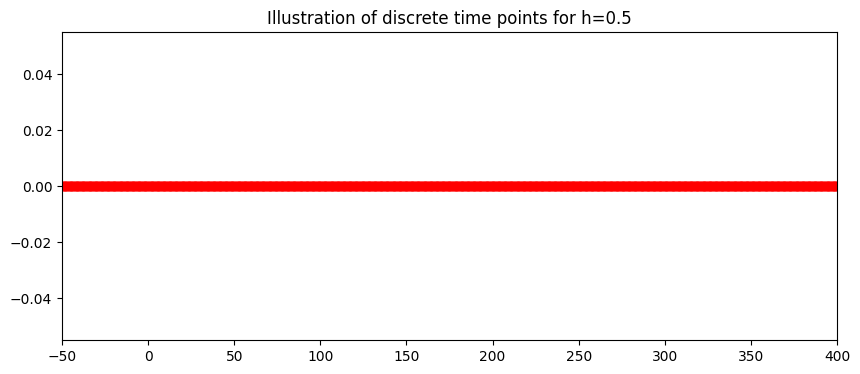

In [2]:
### Setting up time
a=-50
b=400
h=0.5


N=int((b-a)/(h))
time=np.arange(a,b+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.xlim((a,b))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## 2nd Order Taylor Solution
The 2nd Order Taylor difference equation is given by
\begin{equation}  w_{i+1}=w_i+h\left[f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)\right],\end{equation}
where
\begin{equation}  f(t_i,w_i)=\frac{-(w_i-E_L) + R_mI(t_i)}{\tau_m},\end{equation}
and
\begin{equation}  f'(t_i,w_i)=\frac{-\frac{-(w_i-E_L) + R_mI(t_i)}{\tau_m}+0.1}{\tau_m},\end{equation}
which gives
\begin{equation} w_{i+1}=w_i+h,\end{equation}

for $i=0,1,...,899$ and
where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t_i)=0.01t_i$
and the initial condition
$V(t_0=-50) = -75$ using a stepsize of $h=0.5$.
Putting in the values the difference equation is 
\begin{equation} w[i+1]=w[i]+0.5\big[-(w[i]--75) + 10*0.01*time[i]\big]/10+\frac{0.5^2}{2}\big[-\big(-(w[i]--75) + 10*0.01*time[i])/10\big)/10+0.1/10\big] \end{equation} 



In [3]:
IC=-75
w=np.zeros(N+1)
e=np.zeros(N+1)
w[0]=IC

for i in range (0,N):
    ###
   w[i+1]=w[i]+h*(-(w[i]+75)+0.1*time[i])/10+h*h/2*((-(-(w[i]+75)+0.1*time[i])/10)/10+0.1/10)

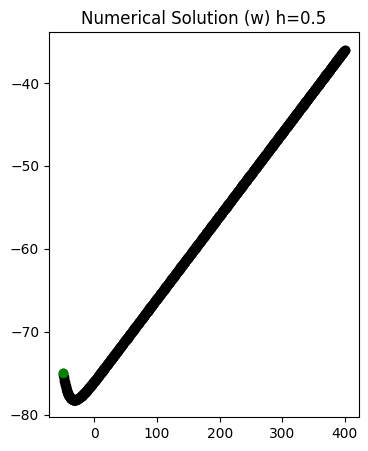

In [4]:
fig = plt.figure(figsize=(4,5))
# --- left hand plot
#ax = fig.add_subplot(1,4,1)
plt.plot(time,w,'o:',color='k')
plt.plot(time[0],w[0],'o',color='green')


#ax.legend(loc='best')
plt.title('Numerical Solution (w) h=%s'%(h))
plt.show()


In [5]:

d = {'time t_i': time,      'Taylor (w_i) ':w}
df = pd.DataFrame(data=d)
df

,time t_i,Taylor (w_i)
0,-50.0,-75.000000
1,-49.5,-75.242500
2,-49.0,-75.470741
3,-48.5,-75.685417
4,-48.0,-75.887190
...,...,...
896,398.0,-36.200000
897,398.5,-36.150000
898,399.0,-36.100000
899,399.5,-36.050000
